In [8]:
import pandas as pd
import matplotlib.pyplot as plt
dfs = {}
for i in range(4):
    dfs[i] = pd.read_csv(f'data/adc{i}.csv', index_col='time').iloc[50:200]

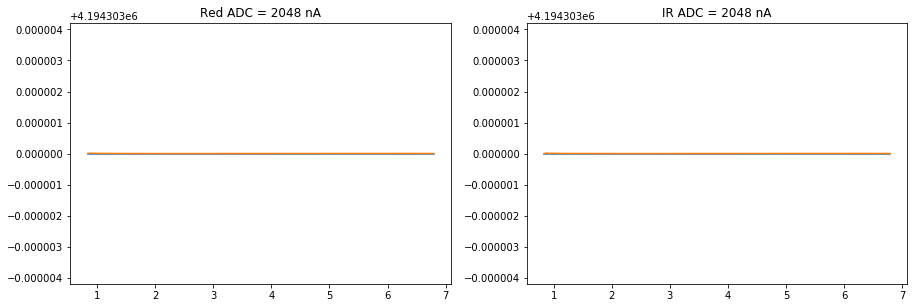

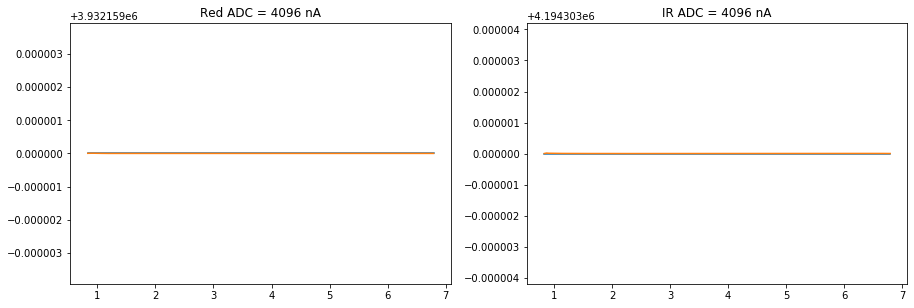

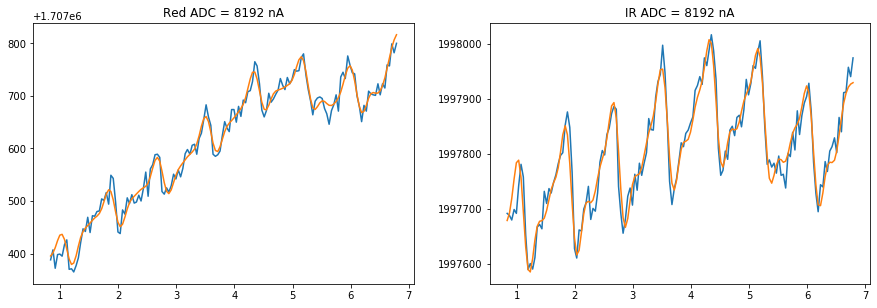

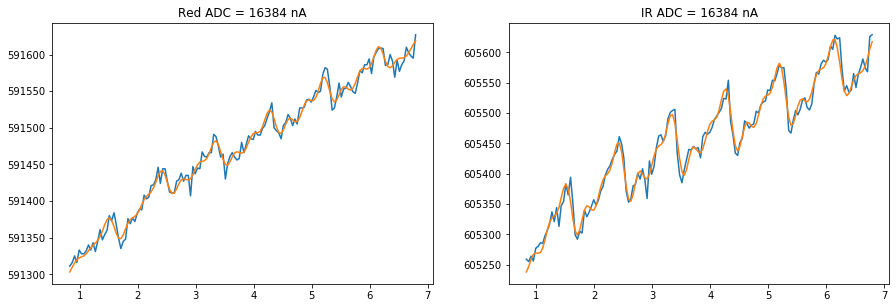

In [9]:
from pyts import decomposition
import numpy as np

values = [2048, 4096, 8192, 16384]

for i in range(4):
    df = dfs[i]

    plt.figure(figsize=[15,4.8])
    
    ## red 
    plt.subplot(1, 2, 1)
    plt.title(f'Red ADC = {values[i]} nA')
    F = df['Reflect: Red'].to_numpy()
    plt.plot(df.index, F)
    
    L = 75

    ssa = decomposition.SingularSpectrumAnalysis(window_size = L)
    F_ssa = ssa.fit_transform(F.reshape(1, -1))
    
    # filter is just a pca truncation
    filtered_red = np.sum(F_ssa[:8], axis=0)
    plt.plot(df.index, filtered_red)
    
    ## ir
    plt.subplot(1, 2, 2)
    plt.title(f'IR ADC = {values[i]} nA')
    F = df['Reflect: IR'].to_numpy()
    plt.plot(df.index, F)
    
    L = 75

    ssa = decomposition.SingularSpectrumAnalysis(window_size = L)
    F_ssa = ssa.fit_transform(F.reshape(1, -1))
    
    # filter is just a pca truncation
    filtered_ir = np.sum(F_ssa[:8], axis=0)
    plt.plot(df.index, filtered_ir)